#### Import des librairies

In [1]:
import pandas as pd

#### Chargement des données

In [2]:
df_train = pd.read_csv('./data/sentiment-train',sep='\t',header=None,names=['text','label'])

In [3]:
df_train.text.head()

0         hide new secretions from the parental units 
1                 contains no wit , only labored gags 
2    that loves its characters and communicates som...
3    remains utterly satisfied to remain the same t...
4    on the worst revenge-of-the-nerds clichés the ...
Name: text, dtype: object

#### Création des vecteurs One Hot

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df_train.text)

In [6]:
X_train_counts.shape

(49016, 13745)

In [7]:
count_vect = CountVectorizer(max_features=1000)
X_train_counts = count_vect.fit_transform(df_train.text)

In [8]:
X_train_counts.shape

(49016, 1000)

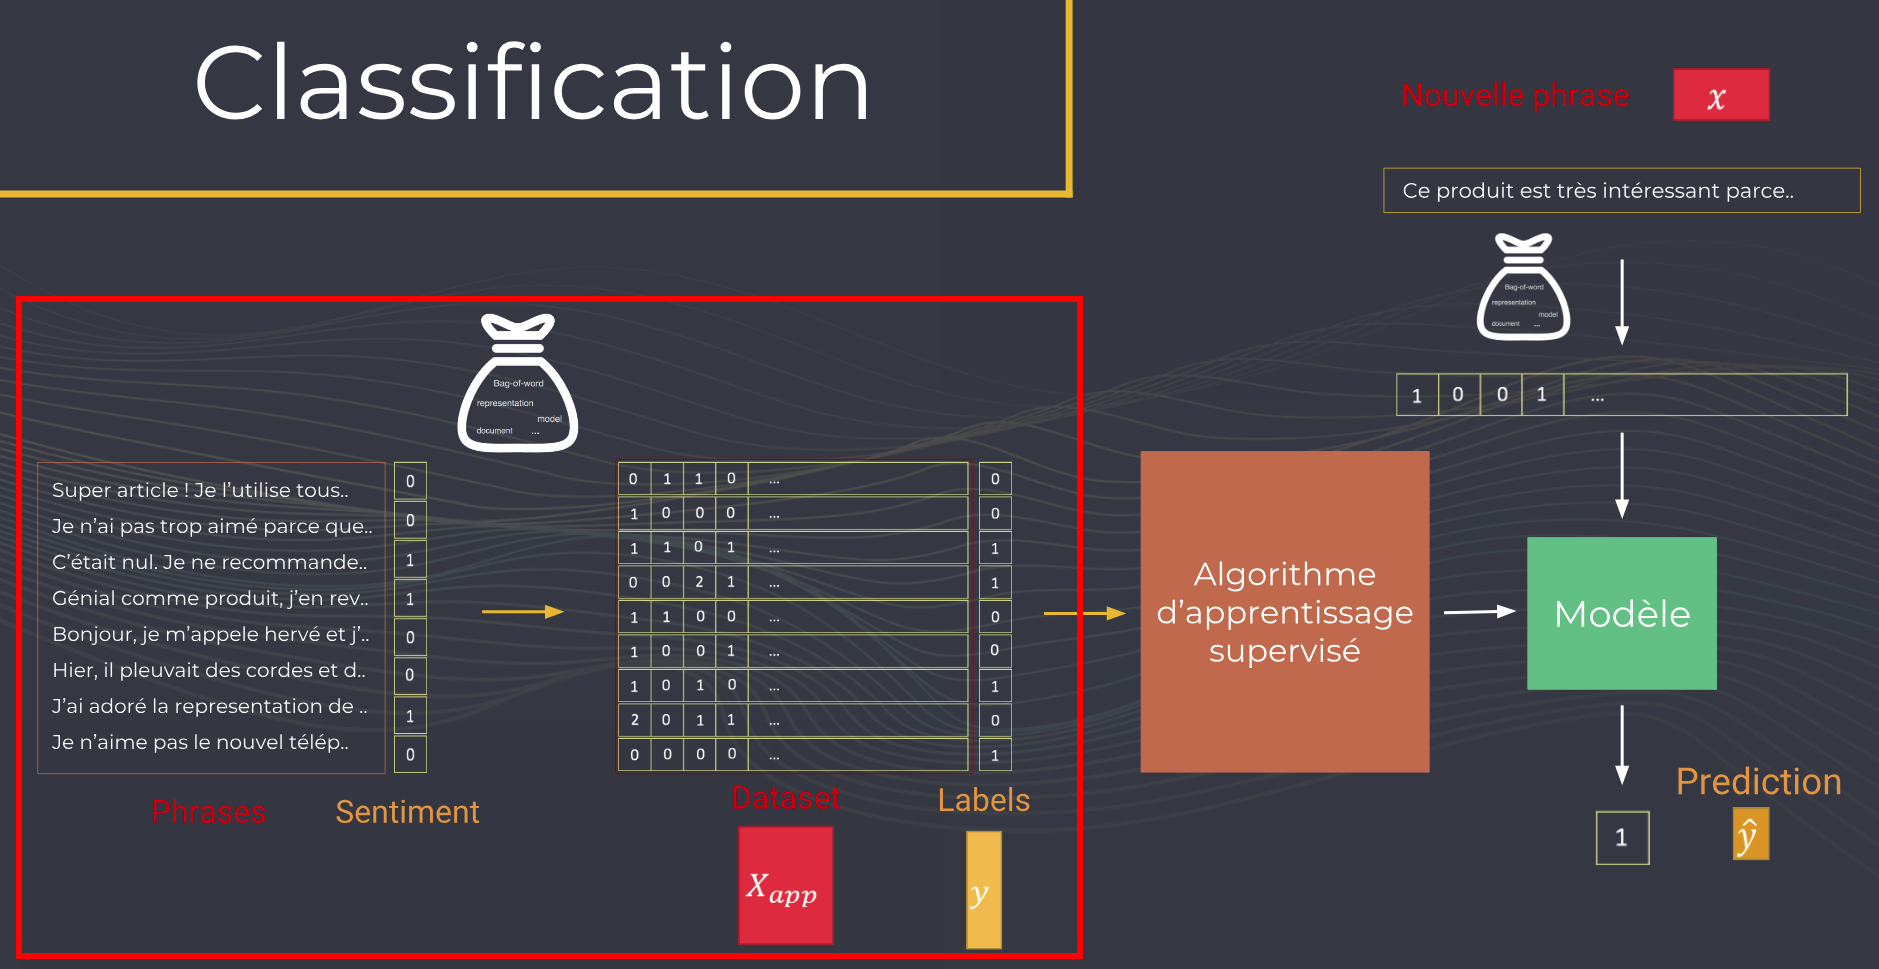

In [9]:
from IPython.display import Image
Image("../Images/Etape1.png", width=1000)

#### Définition du modèle

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

#### Apprentissage du modèle

In [11]:
clf.fit(X_train_counts,df_train.label)

/home/sebastien/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

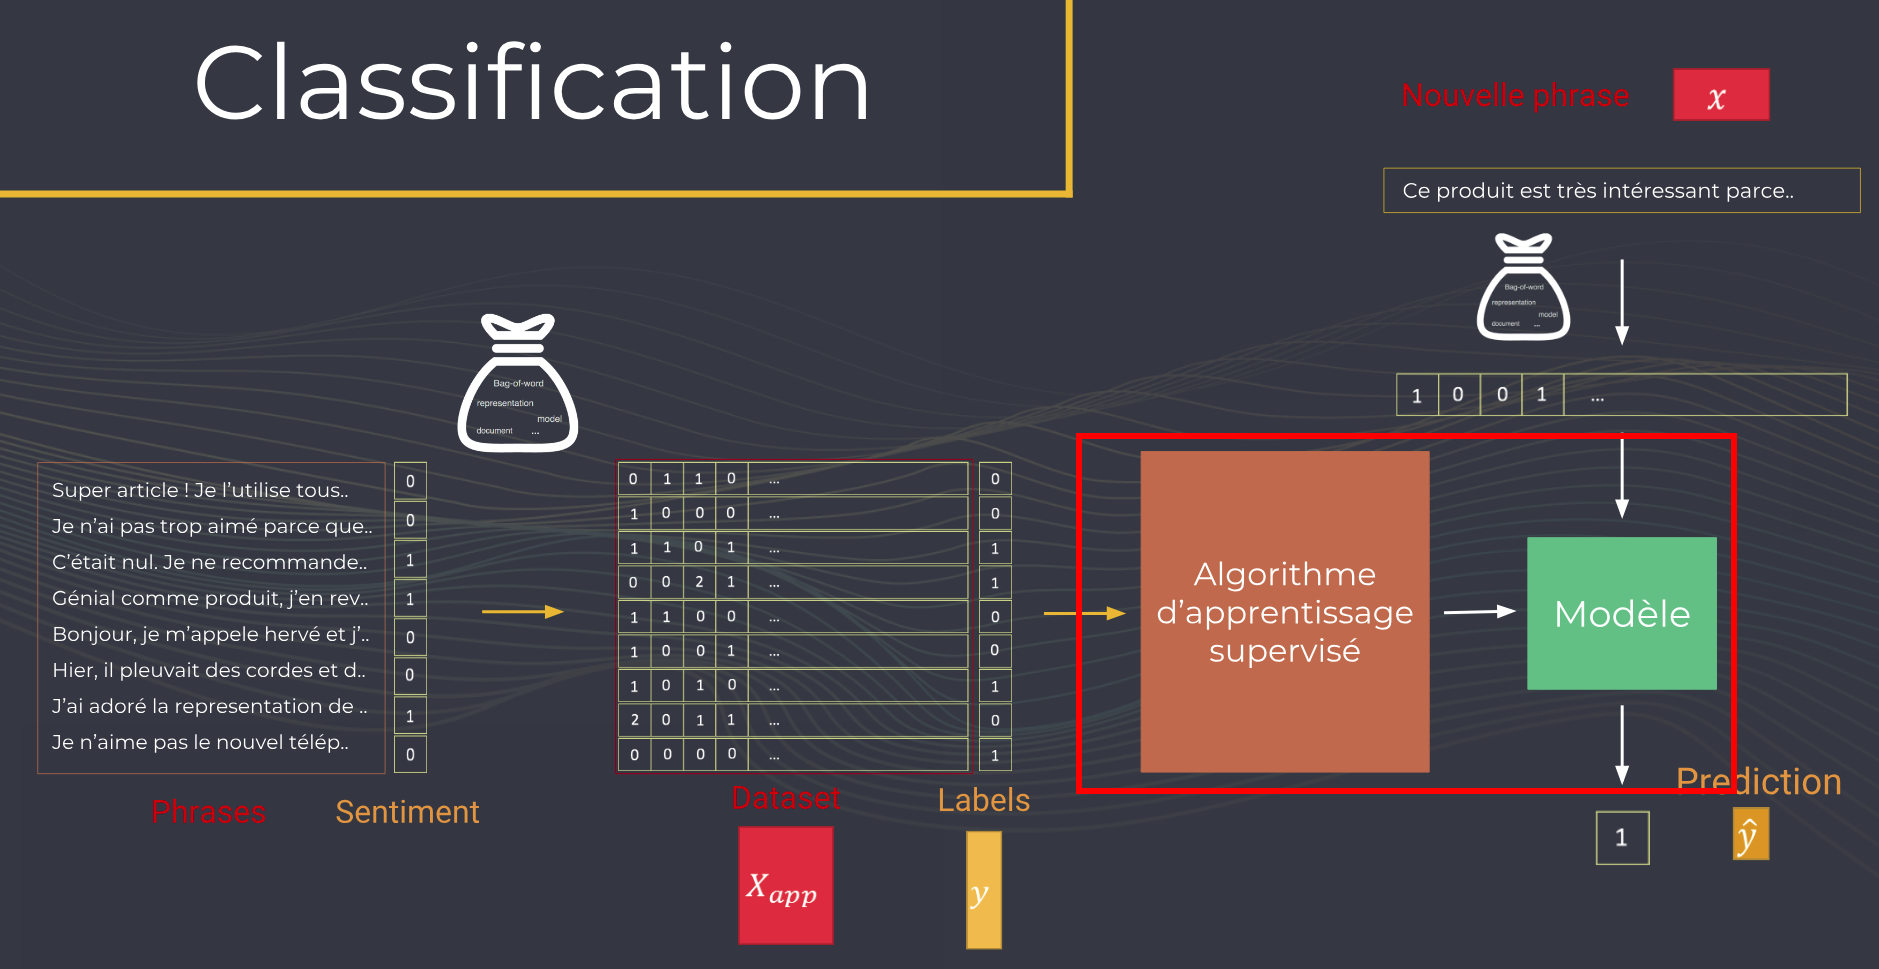

In [12]:
from IPython.display import Image
Image("../Images/Etape2.png", width=1000)

### Prédiction sur le jeu de test

In [13]:
df_test = pd.read_csv('./data/sentiment-test',sep='\t',header=None,names=['text','label'])

#### Transformations des données de test

In [14]:
X_test_counts = count_vect.transform(df_test.text)

#### Prédictions

In [15]:
predictions = clf.predict(X_test_counts)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(predictions,df_test.label)

0.746541228555617

In [18]:
clf.score(X_test_counts,df_test.label)

0.746541228555617